Final Project Check-in 2018-11-16
------

Group Name
-----

 Bean Solution

Student Names
----

1. Xin Sun
2. Zhi Li
3. Minchen Wang
4. Hongdou Li
5. Bowen Ma

Load Data
-----

In [3]:
import pandas as pd
import numpy as np
import time 
import datetime
import scipy.stats

### Pre Join Data

In [4]:
# load inital data
bids = pd.read_csv("bids.csv")
train = pd.read_csv("train.csv")
# test = pd.read_csv("trian.csv")

In [5]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [6]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [16]:
# join the training data set with full data set
bid = pd.merge(train, bids, on='bidder_id', how='left')

In [12]:
# write to file
bid.to_csv("bid.csv")

### Load Joined Data

In [2]:
data = pd.read_csv("bid.csv")
data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,1,001068c415025a009fee375a12cff4fcnht8y,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0,7179832.0,4ifac,jewelry,phone561,9.706345e+15,bn,139.226.147.115,vasstdc27m7nks3
1,2,0030a2dd87ad2733e0873062e4f83954mkj86,a3d2de7675556553a5f08e4c88d2c228jem8t,f3bc67b04b43c3cebd1db5ed4941874c9br67,0,6805028.0,obbny,mobile,phone313,9.704554e+15,ir,21.67.17.162,vnw40k8zzokijsv
2,3,00a0517965f18610417ee784a05f494d4dw6e,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0,4574244.0,gst86,books and music,phone1400,9.642087e+15,ng,160.114.155.198,utvvayoovsqfycf
3,4,00a0517965f18610417ee784a05f494d4dw6e,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0,7525691.0,b25ls,books and music,phone142,9.708597e+15,in,210.227.213.71,wxmtewnifm8v3kb
4,5,00a0517965f18610417ee784a05f494d4dw6e,52743ba515e9c1279ac76e19f00c0b001p3pm,7578f951008bd0b64528bf81b8578d5djy0uy,0,6511001.0,1cbiu,books and music,phone25,9.702977e+15,in,86.245.94.173,q7mzsnjxikn3tq3


### Data Clean

In [13]:
pd.isnull(data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

In [49]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

29

In [51]:
train[train['bidder_id'].isin(nobids_train)]['outcome']

49      0.0
88      0.0
175     0.0
236     0.0
262     0.0
271     0.0
299     0.0
305     0.0
339     0.0
364     0.0
620     0.0
633     0.0
741     0.0
750     0.0
773     0.0
808     0.0
908     0.0
997     0.0
1026    0.0
1052    0.0
1135    0.0
1149    0.0
1304    0.0
1496    0.0
1511    0.0
1551    0.0
1633    0.0
1729    0.0
1909    0.0
Name: outcome, dtype: float64

**There exist 29 bidder in training data set having no bid data. After checking with their labels, they were all marked as human. Since we aim to detect robot, we will just ignore them.**

In [17]:
pd.isnull(bids).any()

bid_id         False
bidder_id      False
auction        False
merchandise    False
device         False
time           False
country         True
ip             False
url            False
dtype: bool

**For the full data set, there are only some of observations missing country entry.**

In [62]:
# for all the missing value observation, drop it
bid = data.dropna()

### Data Exploration

In [29]:
print(f"total row in bid:          {len(bid)}")
print(f"total bids in bid:         {len(bid['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bid['bidder_id'].unique())}")
print(f"total payment in bids:     {len(bid['payment_account'].unique())}")
print(f"total address in bids:     {len(bid['address'].unique())}")
print(f"total auction in bids:     {len(bid['auction'].unique())}")
print(f"total merchandise in bids: {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

total row in bid:          3071253
total bids in bid:         3071225
total bidder in bids:      2013
total payment in bids:     2013
total address in bids:     2013
total auction in bids:     12741
total merchandise in bids: 11
total device in bids:      5730
total country in bids:     199
total ip in bids:          1030951
total url in bids:         663874


**From this output, we can see the payment and address is one-to-one correspondence, we can igonre these two features.**

In [40]:
print(f"total robots in train set: {len(bid[bid['outcome'] == 1])}")
print(f"total human in train set:  {len(bid[bid['outcome'] == 0])}")

total robots in train set: 412416
total human in train set:  2658837


**These trainning data set has unbalanced number of robots and human, we need to do undersampling before training the model.**

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
bids = bid.groupby(['bidder_id']).size().to_frame()
bids = pd.merge(bids, bid[['bidder_id', 'outcome']], on=['bidder_id'],how='left')
bids_robot = d[d['outcome']][d.columns[1:3]]

In [ ]:
d[[d['outcome']==1]]

In [ ]:
sns.distplot(d[d['outcome']==0], hist=False, rug=True);

In [ ]:
sns.kdeplot(d[d['outcome']==0], bw=.2, label="human")
sns.kdeplot(d[d['outcome']==1], bw=2, label="robot")
plt.legend();

In [ ]:
auctions = bid.groupby(['auction','bidder_id']).size().to_frame()
bid = pd.merge(bid,auctions, on=['auction', 'bidder_id'],how='left')

### Feature Creation

In [63]:
# bidding time difference per user (bidder_id) (done)
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction (done)
bids_per_auction  = bid.groupby(['auction','bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby('country').size()/bid.groupby('country').size() 
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby('device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# average number of bids per url per user

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique()/bid.groupby('bidder_id')['bid_id'].nunique()
#bid[['bidder_id', 'ip']].drop_duplicates().groupby('bidder_id').size()/bid.groupby('bidder_id').size()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=scipy.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

auction_url_entropy = bid.groupby(['auction','bidder_id'])['url'].apply(ent)
#auction_url_entropy = auction_url_entropy.to_frame().reset_index()
auction_url_entropy = auction_url_entropy.groupby('bidder_id').mean().reset_index()

In [64]:
# merge the features back
bid = pd.merge(bid,bids_per_auction, on=['auction','bidder_id'],how='left')
bid = pd.merge(bid,pbots_country, on='country',how='left')
bid = pd.merge(bid,pbots_device, on='device',how='left')
bid = pd.merge(bid,ip_bids_ratio, on='bidder_id',how='left')
bid = pd.merge(bid,auction_url_entropy,on='bidder_id',how='left')
# set column names 
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
       'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device', 
               'ip_bids_ratio','auction_url_entropy']

### Under Sampling

In [65]:
bots = bid.loc[bid.outcome == 1]
human = bid.loc[bid.outcome == 0]
human_sample = human.sample(n=len(bots),random_state=99)
bid_balance = pd.concat([bots,human_sample])

In [66]:
bid_balance = bid_balance.dropna()

Fit scikit-learn model
----

### Split Train and Test set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
y = bid_balance['outcome']
X = bid_balance.iloc[:,-6:]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### First Model : Decision Tree

In [69]:
from sklearn import tree

In [70]:
# fit the model
# Decision Tree
kwargs_regularize = dict(criterion='gini',
                         max_depth=4, 
                         min_samples_split=10)
clf = tree.DecisionTreeClassifier(**kwargs_regularize)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Tree Visualization

In [71]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

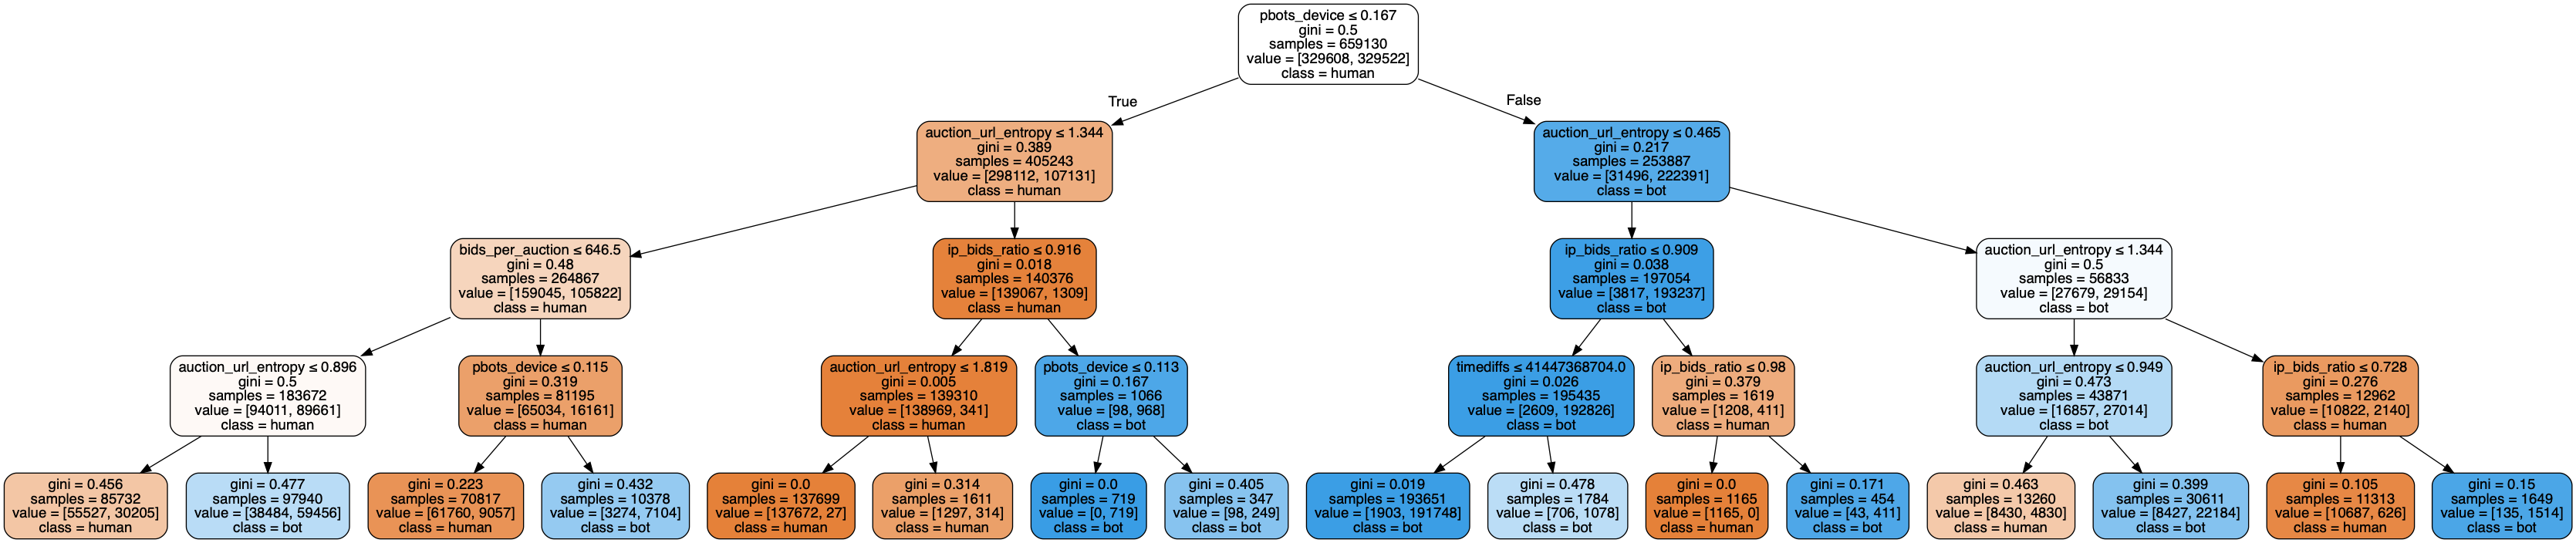

In [72]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         filled=True, rounded=True,
                     feature_names=X.columns.values,
                     class_names = ['human','bot'],
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Evaluation Metric
----

In [74]:
# predict
y_dt_pred = clf.predict(X_test)
y_dt_score = clf.predict_proba(X_test)[:,1]

### Accuracy

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.852


### AUC

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

In [78]:
print('Classification Report of Model 1 Decision Tree')
print(classification_report(y_test, y_dt_pred))

Classification Report of Model 1 Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     82255
           1       0.85      0.86      0.85     82528

   micro avg       0.85      0.85      0.85    164783
   macro avg       0.85      0.85      0.85    164783
weighted avg       0.85      0.85      0.85    164783



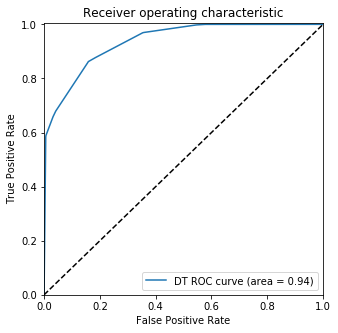

In [79]:
# Plot ROC in one graph
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()